In [38]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
import requests

In [39]:
league = 'Premier League'

In [40]:
url = f'https://fbref.com/en/comps/9/stats/{league[0]}-{league[1]}-Stats#all_stats_standard'
url = 'https://fbref.com/en/comps/10/stats/Championship-#all_stats_standard'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_team = pd.read_html(response, header = 1)[0]

In [41]:
df_team.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Birmingham City,30,26.7,44.1,45,506,4140,46.0,48,30,...,1.04,0.65,1.70,1.00,1.65,1.07,0.77,1.83,1.01,1.78
1,Blackburn,31,25.5,51.6,45,506,4140,46.0,59,48,...,1.28,1.04,2.33,1.28,2.33,1.32,1.04,2.36,1.31,2.35
2,Bristol City,26,26.5,47.8,45,506,4140,46.0,52,28,...,1.13,0.61,1.74,0.98,1.59,1.12,0.71,1.83,1.01,1.71
3,Cardiff City,34,27.5,45.5,45,506,4140,46.0,48,34,...,1.04,0.74,1.78,1.00,1.74,0.95,0.70,1.65,0.91,1.61
4,Coventry City,26,26.8,51.4,45,506,4140,46.0,66,39,...,1.43,0.85,2.28,1.37,2.22,1.39,0.95,2.33,1.28,2.23


In [42]:
df_player = pd.read_html(response, header = 1)[2]

In [43]:
df_player.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,1,Azeem Abdulai,sct SCO,MF,Swansea City,21-150,2002,7,0,139,...,0.65,0.65,0.00,0.65,NaN,NaN,NaN,NaN,NaN,Matches
1,2,Ken Aboh,eng ENG,MF,Norwich City,19-180,2004,1,0,10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
2,3,Che Adams,sct SCO,"FW,MF",Southampton,27-299,1996,40,25,2289,...,0.16,0.79,0.63,0.79,0.53,0.14,0.68,0.53,0.68,Matches
3,4,Ebou Adams,gm GAM,"MF,DF",Cardiff City,28-113,1996,11,3,310,...,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,Matches
4,5,Albert Adomah,gh GHA,"DF,FW",QPR,36-146,1987,16,2,370,...,0.00,0.00,0.00,0.00,0.04,0.10,0.13,0.04,0.13,Matches


In [44]:
df_player = df_player[df_player['Rk'] != 'Rk']

In [45]:
df_player.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

In [46]:
df_player = df_player[['Player','Squad','Gls','Ast','G+A']]

In [47]:
df_player['G+A'] = df_player['G+A'].astype(float)

In [48]:
merged_df = pd.merge(df_team, df_player, on='Squad')
merged_df = merged_df[['Squad','Player','Gls_y','Ast_y','G+A_x','G+A_y']]

In [49]:
merged_df['G+A_x'] = merged_df['G+A_x'].astype(float)
merged_df['G+A_y'] = merged_df['G+A_y'].astype(float)
merged_df.rename(columns={'Gls_y':'Gls','Ast_y':'Ast','G+A_x':'Team_G+A','G+A_y':'Player_G+A'}, inplace=True)

In [50]:
merged_df['%_of_Team_G+A'] = (merged_df['Player_G+A'] / merged_df['Team_G+A']) * 100
merged_df['%_of_Team_G+A'] = merged_df['%_of_Team_G+A'].round(2)

In [51]:
sorted_df = merged_df.sort_values(by=['Squad', '%_of_Team_G+A'], ascending=[True, False])
sorted_df

,Squad,Player,Gls,Ast,Team_G+A,Player_G+A,%_of_Team_G+A
28,Birmingham City,Jay Stansfield,12,2,78.0,14.0,17.95
2,Birmingham City,Juninho Bacuna,7,6,78.0,13.0,16.67
20,Birmingham City,Koji Miyoshi,6,6,78.0,12.0,15.38
14,Birmingham City,Jordan James,8,0,78.0,8.0,10.26
6,Birmingham City,Siriki Dembélé,6,1,78.0,7.0,8.97
...,...,...,...,...,...,...,...
717,West Brom,Yann M'Vila,0,0,113.0,0.0,0.00
719,West Brom,Callum Marshall,0,0,113.0,0.0,0.00
722,West Brom,Alex Palmer,0,0,113.0,0.0,0.00
724,West Brom,Erik Pieters,0,0,113.0,0.0,0.00


In [52]:
first_player_df = sorted_df.groupby('Squad').head(1).reset_index()

In [53]:
second_player_df = sorted_df.groupby('Squad').nth(1).reset_index()
second_player_df.head(1)

,index,Squad,Player,Gls,Ast,Team_G+A,Player_G+A,%_of_Team_G+A
0,2,Birmingham City,Juninho Bacuna,7,6,78.0,13.0,16.67


In [54]:
third_player_df = sorted_df.groupby('Squad').nth(2).reset_index()
#third_player_df


In [55]:
first_player_df = first_player_df.merge(second_player_df[['Squad', 'Player','%_of_Team_G+A']], how='left', on='Squad')
first_player_df = first_player_df.merge(third_player_df[['Squad', 'Player','%_of_Team_G+A']], how='left', on='Squad')
first_player_df.rename(columns={'Player': '3rd Player', 'Player_y': '2nd Player', 'Player_x' : 'Player'}, inplace=True)

In [56]:
first_player_df.rename(columns={'%_of_Team_G+A': '3rd Player %_of_Team_G+A', '%_of_Team_G+A_y': '2nd Player %_of_Team_G+A', '%_of_Team_G+A_x' : 'Player %_of_Team_G+A'}, inplace=True)
first_player_df.drop(columns=['index'], inplace=True)
first_player_df.drop(columns=['Gls','Ast','Player_G+A'], inplace=True)

In [57]:
df = first_player_df
df = df[['Squad', 'Team_G+A', 'Player', 'Player %_of_Team_G+A', '2nd Player', '2nd Player %_of_Team_G+A', '3rd Player', '3rd Player %_of_Team_G+A']]
df.rename(columns={'Player %_of_Team_G+A': 'Player % of Team G+A', '2nd Player %_of_Team_G+A': '2nd Player % of Team G+A', '3rd Player %_of_Team_G+A': '3rd Player % of Team G+A'}, inplace=True)

In [58]:
df.rename(columns={'Squad': 'Team', 'Player': '1st Player', 'Player % of Team G+A' : '1st Player %of Team G+A'}, inplace=True)

In [59]:
df.index = df.index + 1

In [60]:
df.sort_values(by='1st Player %of Team G+A', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1
df


,Team,Team_G+A,1st Player,1st Player %of Team G+A,2nd Player,2nd Player % of Team G+A,3rd Player,3rd Player % of Team G+A
1,Blackburn,107.0,Sammie Szmodics,28.97,Tyrhys Dolan,8.41,Andrew Moran,7.48
2,Plymouth Argyle,97.0,Morgan Whittaker,27.84,Ryan Hardie,16.49,Finn Azaz,12.37
3,Southampton,143.0,Adam Armstrong,23.78,Che Adams,13.99,Stuart Armstrong,8.39
4,Sunderland,85.0,Jack Clarke,22.35,Daniel Neil,10.59,Jobe Bellingham,9.41
5,Coventry City,105.0,Haji Wright,20.95,Ellis Simms,13.33,Callum O'Hare,8.57
6,Leeds United,134.0,Crysencio Summerville,20.90,Georginio Rutter,16.42,Daniel James,14.93
7,QPR,74.0,Ilias Chair,20.27,Chris Willock,10.81,Lyndon Dykes,9.46
8,Norwich City,128.0,Gabriel,19.53,Josh Sargent,14.06,Jon Rowe,10.94
9,Birmingham City,78.0,Jay Stansfield,17.95,Juninho Bacuna,16.67,Koji Miyoshi,15.38
10,Leicester City,145.0,Kiernan Dewsbury-Hall,17.93,Jamie Vardy,13.79,Abdul Fatawu Issahaku,13.10


In [61]:
df.loc[df['1st Player'] == 'Gabriel', '1st Player'] = 'Gabriel Sara'
#df.loc[df['1st Player'] == 'Son Heung-min', '1st Player'] = 'Heung-min Son'
#df.loc[df['2nd Player'] == 'Hwang Hee-chan', '2nd Player'] = 'Hee-chan Hwang'
#df


In [62]:
df['1st Player'] = df['1st Player'].str.split().apply(lambda x: x[0][0] + '. ' + x[-1])
df['2nd Player'] = df['2nd Player'].str.split().apply(lambda x: x[0][0] + '. ' + x[-1])
df['3rd Player'] = df['3rd Player'].str.split().apply(lambda x: x[0][0] + '. ' + x[-1])

In [63]:
df

,Team,Team_G+A,1st Player,1st Player %of Team G+A,2nd Player,2nd Player % of Team G+A,3rd Player,3rd Player % of Team G+A
1,Blackburn,107.0,S. Szmodics,28.97,T. Dolan,8.41,A. Moran,7.48
2,Plymouth Argyle,97.0,M. Whittaker,27.84,R. Hardie,16.49,F. Azaz,12.37
3,Southampton,143.0,A. Armstrong,23.78,C. Adams,13.99,S. Armstrong,8.39
4,Sunderland,85.0,J. Clarke,22.35,D. Neil,10.59,J. Bellingham,9.41
5,Coventry City,105.0,H. Wright,20.95,E. Simms,13.33,C. O'Hare,8.57
6,Leeds United,134.0,C. Summerville,20.90,G. Rutter,16.42,D. James,14.93
7,QPR,74.0,I. Chair,20.27,C. Willock,10.81,L. Dykes,9.46
8,Norwich City,128.0,G. Sara,19.53,J. Sargent,14.06,J. Rowe,10.94
9,Birmingham City,78.0,J. Stansfield,17.95,J. Bacuna,16.67,K. Miyoshi,15.38
10,Leicester City,145.0,K. Dewsbury-Hall,17.93,J. Vardy,13.79,A. Issahaku,13.10


What to do next:

- Change names so that they are the same as the logo images
- Better Column Names
- Use Table below and figure out a way to visualise nicely 

In [64]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [65]:
df.rename(columns={'Team_G+A': 'Team G+A', '1st Player %of Team G+A' : '1st Player % of Team G+A'}, inplace=True)

In [66]:
df = df[['Team','Badge','Team G+A','1st Player','1st Player % of Team G+A','2nd Player','2nd Player % of Team G+A','3rd Player','3rd Player % of Team G+A']]

In [67]:
df = df.round(0)
df[['Team G+A','1st Player % of Team G+A','2nd Player % of Team G+A','3rd Player % of Team G+A']] = df[['Team G+A','1st Player % of Team G+A','2nd Player % of Team G+A','3rd Player % of Team G+A']].astype(int)

In [68]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'Rank'}, inplace=True)

In [69]:
df.drop(columns=['3rd Player','3rd Player % of Team G+A'], inplace=True)

In [70]:
# Background colour
bg_colour = "#E8E5DC"
text_colour = "black"
row_colors = {
    "top2": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}
plt.rcParams["text.color"] = text_colour
plt.rcParams["font.family"] = "monospace"

In [71]:
df.columns = ['Rank', 'Team', 'Badge', 'Team G+A', '1st Player', '% of Team G+A', '2nd Player', '% of Team G+A (2)']

In [72]:
col_defs = [
    ColumnDefinition(
        name="Rank",
        textprops={"ha" : "center"},
        width=0.3,
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha" : "center"},
        width=0.8,
    ),
    ColumnDefinition(
        name="Badge",
        textprops={"ha" : "center", "va" : "center", "color" : bg_colour},
        width=0.3,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Team G+A",
        textprops={"ha" : "center"},
        width=0.4,
    ),
    ColumnDefinition(
        name="1st Player",
        group = "Player Dependence",
        textprops={"ha" : "center", "weight" : "bold"},
        width=0.9,
    ),
    ColumnDefinition(
        name="% of Team G+A",
        group = "Player Dependence",
        textprops={"ha" : "center","color" : 'black', "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.35}},
        cmap=normed_cmap(df["% of Team G+A"], cmap=matplotlib.cm.RdYlGn_r, num_stds=3),
        width=0.4,
    ),
    ColumnDefinition(
        name="2nd Player",
        group = "Player Dependence",
        textprops={"ha" : "center"},
        width=1.0,
    ),
    ColumnDefinition(
        name="% of Team G+A (2)",
        group = "Player Dependence",
        textprops={"ha" : "center"},
        width=0.6,
    ),
    ColumnDefinition(
        name="3rd Player",
        textprops={"ha" : "center"},
        width=0.7,
    ),
    ColumnDefinition(
        name="% of Team G+A (3)",
        textprops={"ha" : "center"},
        width=0.5,
    )
]

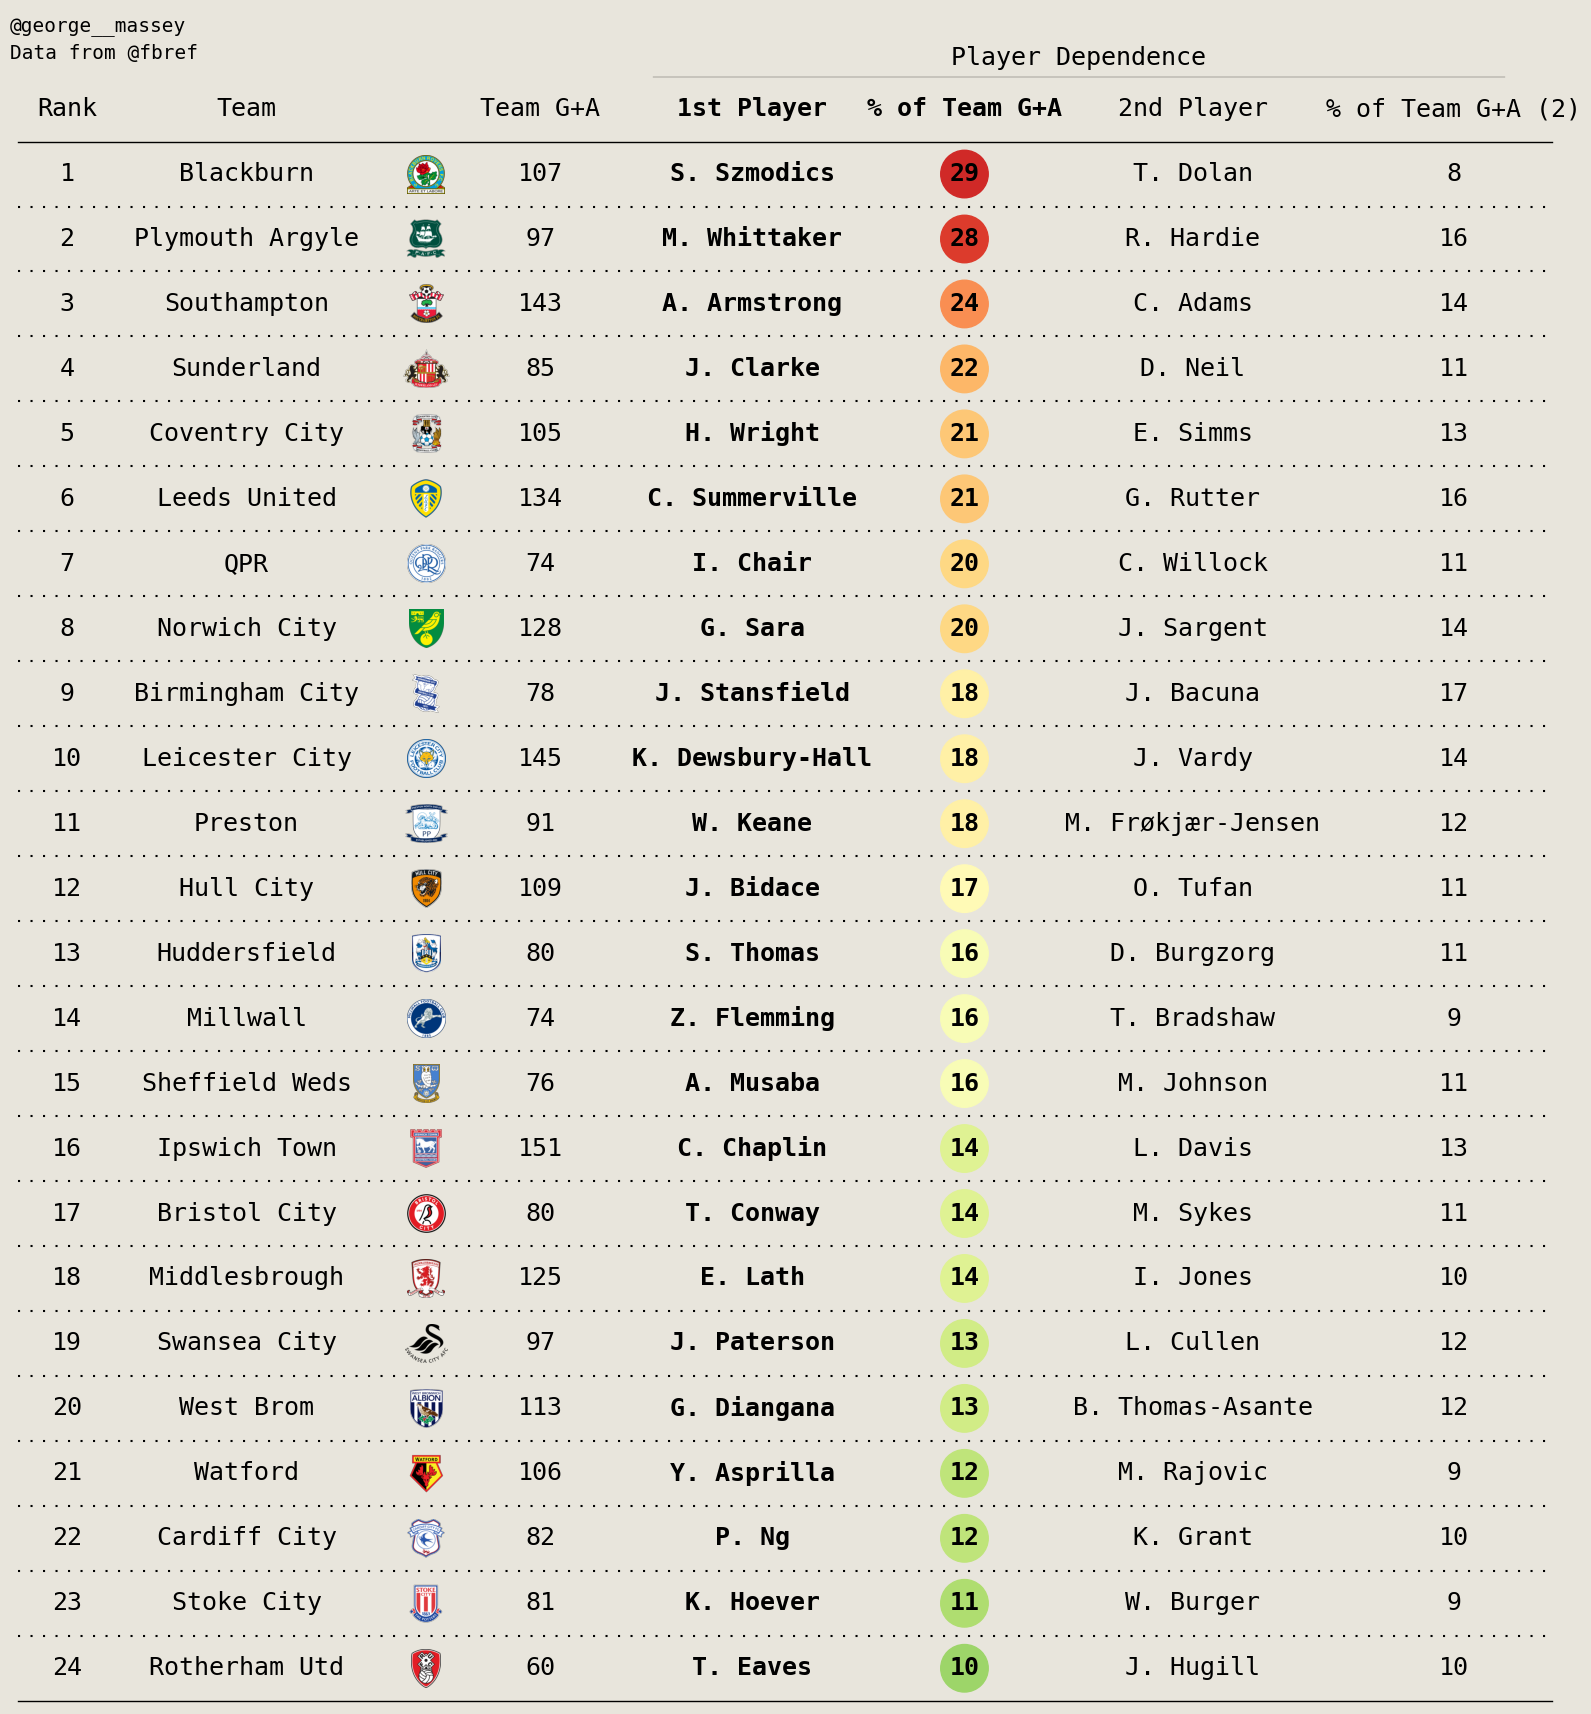

In [73]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_colour)
ax.set_facecolor(bg_colour)
ax.text(0, 0.995, "@george__massey", fontsize=14, transform=ax.transAxes, ha='left', va='top')
ax.text(0, 0.98, "Data from @fbref", fontsize=14, transform=ax.transAxes, ha='left', va='top')

table = Table(
    df,
    column_definitions=col_defs,
    index_col = 'Rank',
    row_dividers=True,
    row_divider_kw={"linewidth" : 1.5, "linestyle" : (0, (1,5))},
    footer_divider=True,
    textprops={"fontsize" : 18},
    ax=ax,
)#.autoset_fontcolors(colnames=["xG", "xGA", "xGD"])
# Set black text color for lighter colored circles

# Rest of the code...

#for idx in [0,1]:
 #   table.rows[idx].set_facecolor(row_colors["top2"])

#for idx in range(2,6):
 #   table.rows[idx].set_facecolor(row_colors["top6"])

#for idx in range(21,24):
 #   table.rows[idx].set_facecolor(row_colors["relegation"])

In [74]:
fig.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{league}_Player_Dependence.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)